In [1]:
import os

## get the data from the previously created directories

In [2]:
base_directory = "C:\\Users\Ramy\.keras\datasets\cats_dogs_small"

In [3]:
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')
test_directory = os.path.join(base_directory, 'test')

In [4]:
train_cats_dir = os.path.join(train_directory, 'cats')
train_dogs_dir = os.path.join(train_directory, 'dogs')
validation_cats_dir = os.path.join(validation_directory, 'cats')
validation_dogs_dir = os.path.join(validation_directory, 'dogs')
test_cats_dir = os.path.join(test_directory, 'cats')
test_dogs_dir = os.path.join(test_directory, 'dogs')

In [5]:
len(os.listdir(train_cats_dir))

1000

### Data reprocessing

In [6]:
import keras

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
#rescale pixels for standardization
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [9]:
train_data_generator

In [10]:
train_generator = train_data_generator.flow_from_directory(train_directory, 
                                                                target_size=(150, 150), 
                                                                batch_size=20, 
                                                                class_mode='binary') # because we haveo nly two classes! binary

Found 2000 images belonging to 2 classes.


In [12]:
print('Shape: ' , train_generator.image_shape)
print('color format: ', train_generator.color_mode)

Shape:  (150, 150, 3)
color format:  rgb


In [13]:
validation_generator = test_data_generator.flow_from_directory(validation_directory, 
                                                                target_size=(150, 150), 
                                                                batch_size=20, 
                                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [15]:
print('Shape: ' , validation_generator.image_shape)
print('color format: ', validation_generator.color_mode)

Shape:  (150, 150, 3)
color format:  rgb


### creating the CNN model

In [29]:
from keras import layers
from keras import models
from keras import optimizers

In [30]:
model = models.Sequential()

In [31]:
#Layer 1
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))

In [32]:
#layer 2
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

In [33]:
#layer 3
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

In [34]:
#layer 4
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

In [45]:
#flatten  and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [47]:
model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ["accuracy"])

In [48]:
import sys
from PIL import Image

### Keras can't handle any empty or destroyed image. so we will use PILLOW library for that reason

In [49]:
history = model.fit_generator(train_generator, 
                             steps_per_epoch=100, 
                             epochs= 5, 
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/5
100/100 [==============================] - 67s 661ms/step - loss: 0.6939 - accuracy: 0.5245 - val_loss: 0.6825 - val_accuracy: 0.5870
Epoch 2/5
100/100 [==============================] - 57s 572ms/step - loss: 0.6895 - accuracy: 0.5424 - val_loss: 0.6611 - val_accuracy: 0.6060
Epoch 3/5
100/100 [==============================] - 57s 573ms/step - loss: 0.6677 - accuracy: 0.6106 - val_loss: 0.6525 - val_accuracy: 0.5990
Epoch 4/5
100/100 [==============================] - 57s 564ms/step - loss: 0.6677 - accuracy: 0.5945 - val_loss: 0.6574 - val_accuracy: 0.6070
Epoch 5/5
100/100 [==============================] - 53s 526ms/step - loss: 0.6446 - accuracy: 0.6459 - val_loss: 0.6109 - val_accuracy: 0.6520


In [50]:
model.save('cat_dog_small_')

INFO:tensorflow:Assets written to: cat_dog_small_\assets


In [51]:
import matplotlib.pyplot as plt

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

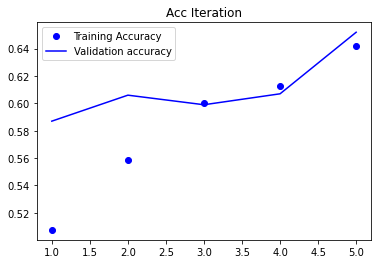

In [54]:
plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Acc Iteration')
plt.legend()

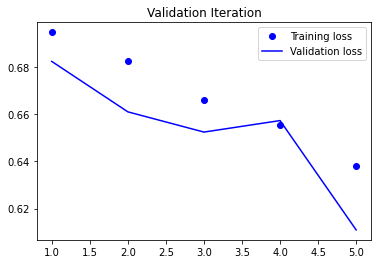

In [55]:
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Validation Iteration')
plt.legend()